In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from matplotlib.pyplot import rcParams
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import svm

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
# check datatypes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [94]:
#Categorical variables:
categorical = train_df.select_dtypes(include = ["object"]).keys()
print(categorical)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [95]:
#Quantitative variables:
quantitative = train_df.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E45041FEC8>,
      dtype=object)

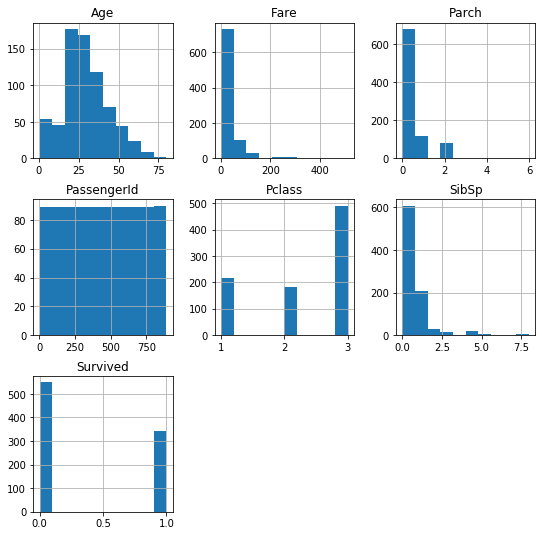

In [96]:
rcParams['figure.figsize'] = 9, 9
train_df[quantitative].hist()

Text(0.5, 1.0, 'Survival rate')

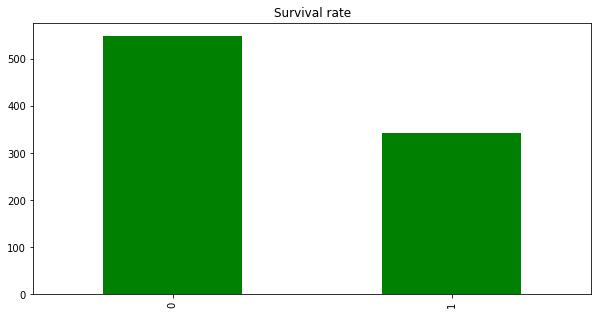

In [126]:
plt.rcParams['figure.figsize'] = [10, 5]
train_df['Survived'].value_counts().plot(kind = 'bar',color='g')
plt.title("Survival rate")

In [97]:
women = train_df.loc[train_df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [98]:
men = train_df.loc[train_df.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


([<matplotlib.patches.Wedge at 0x1e452487b48>,
 [Text(-0.7581208209006488, 0.7970274906908333, 'Womens survival rate'),
  Text(0.5687983181893347, -0.9415245473300123, 'mens survival rate')],
 [Text(-0.4135204477639902, 0.43474226764954543, '74.2%'),
  Text(0.3102536281032734, -0.5135588439981885, '18.9%')])

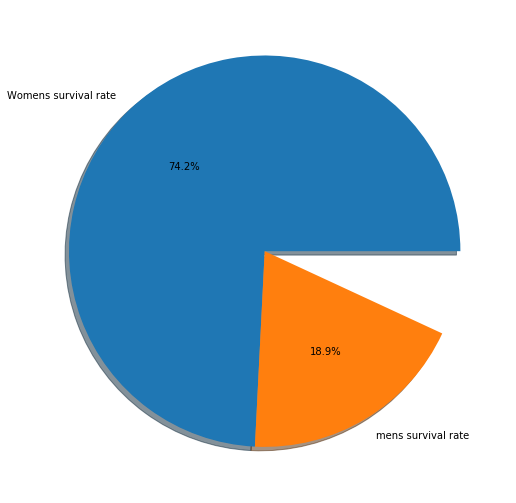

In [116]:
plt.pie([rate_women,rate_men],labels=('Womens survival rate','mens survival rate'),
       autopct ='%1.1f%%',shadow = True)

In [ ]:
# Random Forests
y = train_df["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(test_df[features])

model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=5)
model.fit(X, y)
predictions = model.predict(X_test)

round(model.score(X,y), 4)

In [100]:

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto')
LR.fit(X, y) # 
LR.predict(X_test) # prediction value
round(LR.score(X,y),4) # accuracy to first 4 number

0.8002

In [101]:

NN = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(1, 5), random_state=0)
NN.fit(X, y)
NN.predict(X_test) # prediction value
round(NN.score(X,y), 4)

0.8036

In [102]:

SVM = svm.LinearSVC()
SVM.fit(X, y)
SVM.predict(X_test)
 # prediction value
round(SVM.score(X,y), 4)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7935

Text(0.5, 1.0, 'predictions')

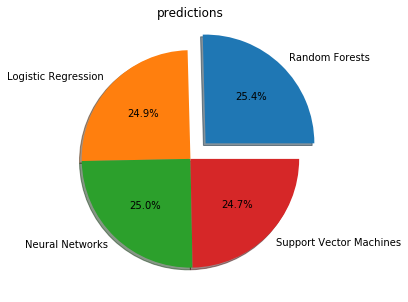

In [134]:
plt.pie([round(model.score(X,y), 4),round(LR.score(X,y),4),
        round(NN.score(X,y), 4),round(SVM.score(X,y), 4)],
        explode = [0.2,0.0,0.0,0.0]
        ,labels=('Random Forests',
                 'Logistic Regression','Neural Networks',
                 'Support Vector Machines'),
       autopct ='%1.1f%%',shadow = True)
plt.title('predictions')

In [158]:
output=pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
print('Survived(1) and unSurvived(0)\n',output)

Survived(1) and unSurvived(0)
      PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
